In [25]:
from tvtk.api  import tvtk
import xarray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mayavi import mlab
import cmocean.cm
import matplotlib

In [31]:
ds = xarray.open_dataset('/Users/baart_f/data/odv/climatology/SDN_MedSea_Clim.nc')
ds = ds.isel(time=1)
arr = np.squeeze(ds.Temperature.values)
median = np.nanmedian(arr)
perc5 = np.nanpercentile(arr, 5)
perc95 = np.nanpercentile(arr, 95)
temp_min = np.nanmin(arr)
temp_max = np.nanmax(arr)
q = [0.05, 0.1, 0.25,  0.5,  0.75, 0.9, 0.95]
percentiles = np.nanpercentile(arr, q)
arr = np.ma.masked_invalid(arr)
arr = arr.filled(0)
arr.shape, np.nanmin(arr),  np.nanmax(arr)
# change dimensiosn  to x,y,z
arr = np.moveaxis(arr, [0, 1, 2], [2, 1, 0])


In [32]:
Y, X, Z = np.meshgrid(ds.latitude.values, ds.longitude.values, ds.altitude.values / 10000)
X.shape, arr.shape

((367, 129, 33), (367, 129, 33))

In [33]:
[percentile for percentile in percentiles]
N = matplotlib.colors.Normalize(temp_min, temp_max)

In [34]:
isos = [
    mlab.contour3d(X, Y, Z, arr,  contours=[percentile])
    for percentile
    in percentiles
]


/Users/baart_f/.virtualenvs/main/lib/python3.6/site-packages/tvtk/array_handler.py:268: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


In [35]:
contours = [
    iso.contour.outputs[0].output 
    for iso
    in isos
]

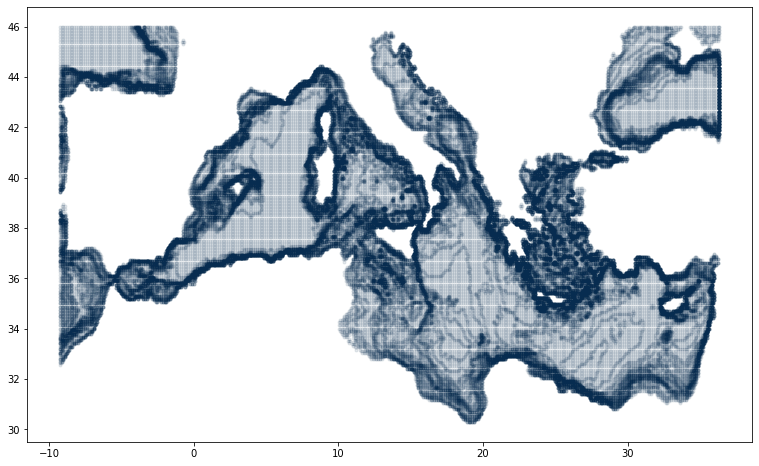

In [42]:
colors = cmocean.cm.thermal(N(percentiles))

fig, ax = plt.subplots(figsize=(13, 8))
for color, contour in list(zip(colors, contours))[:-6]:
    df =  pd.DataFrame(contour.points, columns=['x', 'y', 'z'])
    ax.plot(df.x, df.y, '.', alpha=0.1, color=color)

In [7]:
df.head()

,x,y,z
0,33.500,33.625,0.596980
1,33.625,33.625,0.597756
2,33.500,33.750,0.595591
3,33.625,33.750,0.597320
4,28.625,31.125,0.632466


In [43]:
for i, (color, contour) in enumerate(zip(colors, contours)):
    writer = tvtk.PLYWriter(file_name='polydata-{:04d}-{}.ply'.format(i, matplotlib.colors.rgb2hex(color)))
    writer.add_input_data_object(contour)
    writer.write()

In [42]:
smooth = tvtk.SmoothPolyDataFilter()
smooth.add_input_data_object(contour)
smooth.update()
smooth.output.print_traits()

_in_set:                   0
_vtk_obj:                  (vtkCommonDataModelPython.vtkPolyData)0x1348ea888
actual_memory_size:        21453
bounds:                    (-9.25, 36.26272201538086...143, 1.0500004291534424)
cell_data:                 <tvtk.tvtk_classes.cell_d...a object at 0x1383e1468>
cell_ghost_array:          None
center:                    (13.50636100769043, 38.17...346, 0.3473426550626755)
class_name:                'vtkPolyData'
data_object_type:          0
data_released:             0
debug:                     False
debug_:                    0
extent_type:               0
field_data:                <tvtk.tvtk_classes.field_...a object at 0x1383e14c0>
ghost_level:               0
global_release_data_flag:  0
global_release_data_flag_: 0
global_warning_display:    1
global_warning_display_:   1
information:               <tvtk.tvtk_classes.inform...n object at 0x1383e14c0>
length:                    48.15083128720112
lines:                     <tvtk.tvtk_classes.cel

In [37]:
decimate = tvtk.DecimatePro()
decimate.add_input_data_object(contour)
decimate.update()
decimate.output.print_traits()

_in_set:                   0
_vtk_obj:                  (vtkCommonDataModelPython.vtkPolyData)0x12c062a08
actual_memory_size:        3784
bounds:                    (-9.25, 36.26272201538086...719, 1.0500004291534424)
cell_data:                 <tvtk.tvtk_classes.cell_d...a object at 0x12c047a98>
cell_ghost_array:          None
center:                    (13.50636100769043, 38.17...46, 0.34733740985393524)
class_name:                'vtkPolyData'
data_object_type:          0
data_released:             0
debug:                     False
debug_:                    0
extent_type:               0
field_data:                <tvtk.tvtk_classes.field_...a object at 0x12c047af0>
ghost_level:               0
global_release_data_flag:  0
global_release_data_flag_: 0
global_warning_display:    1
global_warning_display_:   1
information:               <tvtk.tvtk_classes.inform...n object at 0x12c047af0>
length:                    48.1508315933724
lines:                     <tvtk.tvtk_classes.cell_

In [44]:
!open  .

In [44]:
writer.update()
writer.update_data_object()

1

In [74]:
writer